# Data Processing Methods
 ## 1. Feature Engineering

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('weather_classification_data.csv')
dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
dataset.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [4]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [5]:
# Check for duplicates
duplicates = dataset.duplicated().sum()
print("Duplicate rows:", duplicates)

Duplicate rows: 0


In [6]:
from scipy import stats
z_scores = np.abs(stats.zscore(dataset[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']]))
df = dataset[(z_scores < 3).all(axis=1)]  # Keep rows where Z-score is less than 3
dataset = dataset[(z_scores < 3).all(axis=1)]  # Keep rows where Z-score is less than 3


### Creating new features

In [7]:
df.loc[:,'Temp_Humidity_Interaction'] = df['Temperature'] * df['Humidity']
df.loc[:,'Temp_Precipitation_Interaction'] = df['Temperature'] * df['Precipitation (%)']

df.loc[:,'Temperature_Squared'] = df['Temperature'] ** 2
df.loc[:,'Temperature_Cubed'] = df['Temperature'] ** 3


c:\Users\ASESEN20\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\Users\ASESEN20\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
# Encoding categorical features
df = pd.get_dummies(df, columns=['Cloud Cover', 'Season', 'Location'])
dataset = pd.get_dummies(dataset, columns=['Cloud Cover', 'Season', 'Location'])

In [9]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Temp_Humidity_Interaction,Temp_Precipitation_Interaction,...,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,1022.0,1148.0,...,0,0,1,0,0,0,1,0,1,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,3744.0,2769.0,...,0,0,1,0,1,0,0,0,1,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,1920.0,480.0,...,0,0,0,0,1,0,0,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,3154.0,3116.0,...,0,0,0,0,1,0,0,1,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,1998.0,1782.0,...,0,1,0,0,0,0,1,0,0,1


In [10]:
df['UV_Cloud_Interaction'] = df['UV Index'] * (df['Cloud Cover_clear']+3*df['Cloud Cover_cloudy']+4*df['Cloud Cover_overcast']+2*df['Cloud Cover_partly cloudy'])

In [11]:
# Seperate dependent variables (X) and target variable (y)
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

X2=dataset.drop(columns=['Weather Type'])
y2=dataset['Weather Type']

In [12]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y2= le.fit_transform(y2)

# Feature Selection Methods
    Filter Methods
    Wrapper Methods
    Embedded Methods

## Filter Methods: 
Filter methods use statistical techniques to evaluate the relationship between each input feature and the target variable, without involving any machine learning algorithms. They are fast and less computationally expensive.
### 1.Mutual Information

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [14]:
# Compute Mutual Information
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
mi = mutual_info_classif(X_scaled, y)

In [15]:
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

                           Feature  Mutual Information
8   Temp_Precipitation_Interaction            0.706323
4             Atmospheric Pressure            0.691844
3                Precipitation (%)            0.635486
10               Temperature_Cubed            0.614982
0                      Temperature            0.613495
7        Temp_Humidity_Interaction            0.599205
9              Temperature_Squared            0.555712
5                         UV Index            0.534441
6                  Visibility (km)            0.498908
22            UV_Cloud_Interaction            0.452932
1                         Humidity            0.336009
11               Cloud Cover_clear            0.301677
18                   Season_Winter            0.222934
13            Cloud Cover_overcast            0.210891
2                       Wind Speed            0.171173
19                Location_coastal            0.078691
15                   Season_Autumn            0.049004
16        

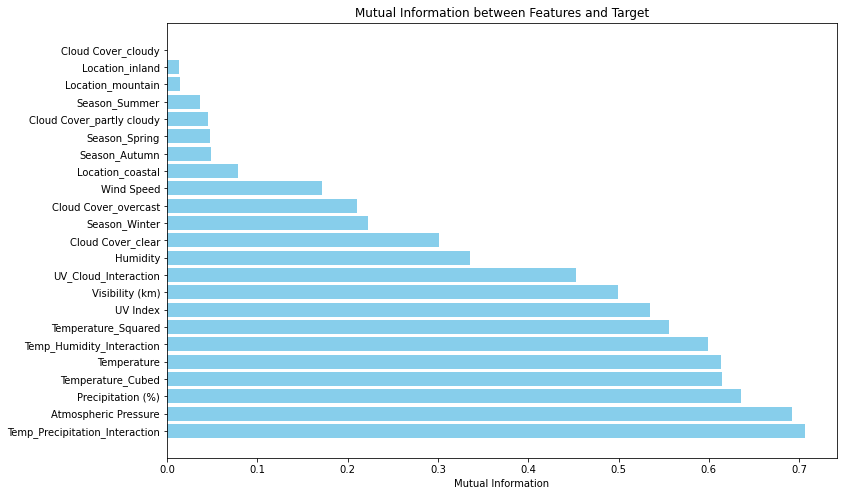

In [16]:
# Plot the Mutual Information scores
plt.figure(figsize=(12, 8))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information between Features and Target')
plt.show()

In [17]:
top_features = mi_df.head(10)['Feature']
X_selected = X[top_features]

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # without feature selection
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [19]:
# Standardize the numeric features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)


In [20]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

model2=LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000)

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred2=model2.predict(X_test2)

In [22]:
from sklearn.metrics import accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.2f}")

Accuracy: 0.94
Accuracy: 0.93


### Variance method

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

### Correlation method

In [ ]:
import numpy as np

correlation = np.abs(np.corrcoef(X, y, rowvar=False)[-1, :-1])
selected_features = X.columns[correlation > 0.1]

## Wrapper Methods
Wrapper methods evaluate feature subsets by training a model and assessing its performance. These methods are more accurate than filter methods but are computationally more expensive.

1) Forward Selection: Starts with an empty model and adds features one by one based on their importance until no significant improvement is observed.

2) Backward Elimination: Starts with all features and removes them one by one, testing the model's performance after each removal.

3) Recursive Feature Elimination (RFE): Recursively removes the least important features based on the model performance.

### Recursive Feature Elimination (RFE)

In [23]:
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [24]:
y_pred3 = rfe.predict(X_test)

In [25]:
# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3:.2f}")

Accuracy: 0.94


## Embedded Methods
Embedded methods perform feature selection as part of the model training process. They are more efficient than wrapper methods because they incorporate feature selection into the model training.


### Lasso Regularization (L1 Regularization):
 Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients. This penalty causes less important features to have zero coefficients, effectively removing them from the model.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
selected_features = X.columns[lasso.coef_ != 0]

### Decision Tree-Based Methods:
 Decision trees inherently perform feature selection by choosing splits based on the most significant features. Feature importance scores can be derived from tree-based models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
selected_features = X.columns[importances > 0.01]